0.07067177537834923 0.8935228806460073


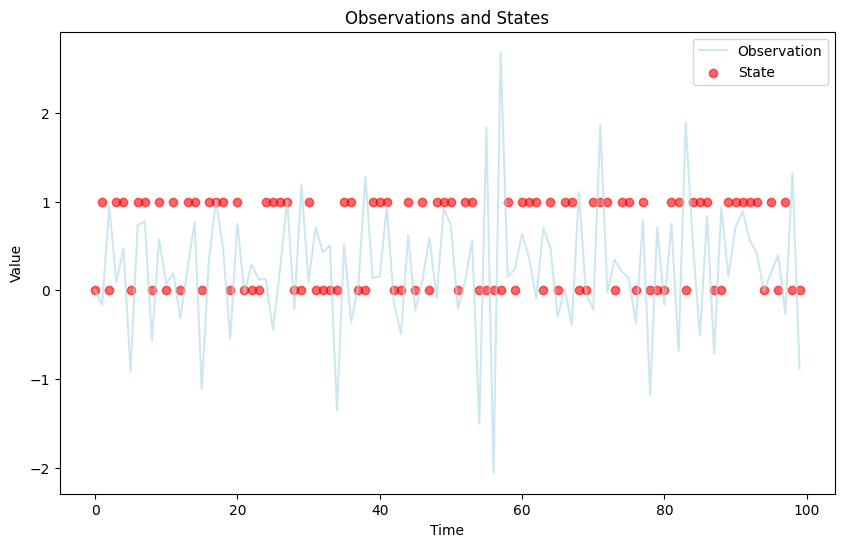

Phi: [-0.86469517 -0.05479682]
Alpha: [0.46700588 0.46068378]
Transition Matrix:
 [[0.4 0.4]
 [0.6 0.6]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
# np.random.seed(0)
num_obs = 100

# Generating parameters for the AR(1) process
phi = np.random.uniform(-1, 1, size=2)  # Two values of phi in [-1, 1]
alpha = np.random.uniform(0, 1, size=2)  # Two values of alpha in [0, 1]
# phi = [-0.5, 0.5]  # Custom values for phi
# alpha = [-0.3, 0.3]  # Custom values for alpha

# Setting mu and sigma
mu = 0
sigma = 0.5

# Transition probabilities
p_11 = np.random.uniform(0, 1)  # Two values of alpha in [0, 1]
p_22 = np.random.uniform(0, 1)  # Two values of alpha in [0, 1]
print(p_11,p_22)

p_11 = 0.94
p_22 = 0.96
transition_matrix = np.array([[p_11, 1 - p_22], [1 - p_11, p_22]])

# Generating observations from a normal distribution
e_t = np.random.normal(mu, sigma, size=num_obs)

# Initialize the state sequence and the AR(1) process
states = np.zeros(num_obs, dtype=int)
x_t = np.zeros(num_obs)

# Generating the state sequence and the AR(1) process
for t in range(1, num_obs):
    # Determine next state based on transition probabilities
    states[t] = np.random.choice([0, 1], p=transition_matrix[:, states[t-1]])

    # Generate the AR(1) process value
    x_t[t] = alpha[states[t]] + phi[states[t]] * x_t[t-1] + e_t[t]

# Creating a DataFrame for the generated data
data = pd.DataFrame({
    'State': states,
    'Observation': x_t
})

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Observation'], label='Observation', color='lightblue', alpha=0.6)
plt.scatter(data.index, data['State'], color='red', label='State', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Observations and States')
plt.legend()
plt.show()

# Print parameters for verification
print("Phi:", phi)
print("Alpha:", alpha)
print("Transition Matrix:\n", transition_matrix)


In [2]:
import MS_VAR
import os

# Assuming the AR process has 1 lag and there are 2 regimes
lags = 1
regimes = 2

# Create an instance of the MS_ME model
model = MS_VAR.MS_ME(data['Observation'].values, lags, regimes)
model.fit(max_iterations=500, tolerance=1e-6)
# Fit the model to the data



Current step: 0 out of 500... With Estimated Parameters Currently at {'alpha': array([[0.35591777],
       [0.44517836]]), 'phi': array([[-0.5488774 ],
       [-0.16202778]]), 'transition_matrix': array([[0.74224682, 0.25775318],
       [0.75814444, 0.24185556]])}
Current step: 1 out of 500... With Estimated Parameters Currently at {'alpha': array([[0.37468511],
       [0.39199712]]), 'phi': array([[-0.59926949],
       [-0.36291321]]), 'transition_matrix': array([[0.74974703, 0.25025297],
       [0.74992653, 0.25007347]])}
Current step: 2 out of 500... With Estimated Parameters Currently at {'alpha': array([[0.37974093],
       [0.37824949]]), 'phi': array([[-0.58040205],
       [-0.417096  ]]), 'transition_matrix': array([[0.75014209, 0.24985791],
       [0.75039353, 0.24960647]])}
Current step: 3 out of 500... With Estimated Parameters Currently at {'alpha': array([[0.3809808 ],
       [0.37542089]]), 'phi': array([[-0.56708745],
       [-0.45214529]]), 'transition_matrix': array([[

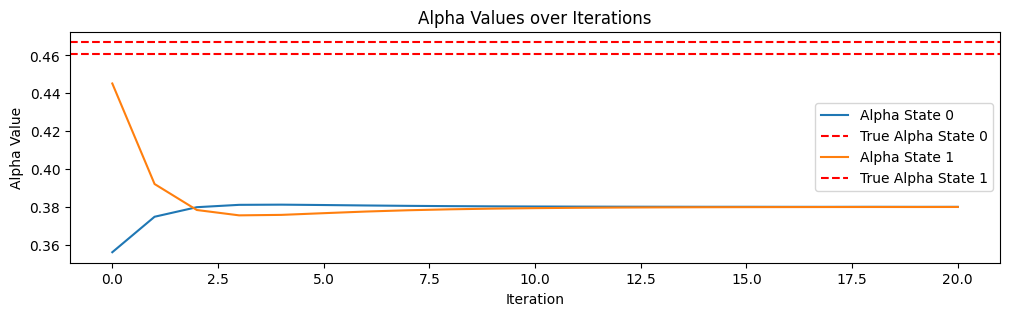

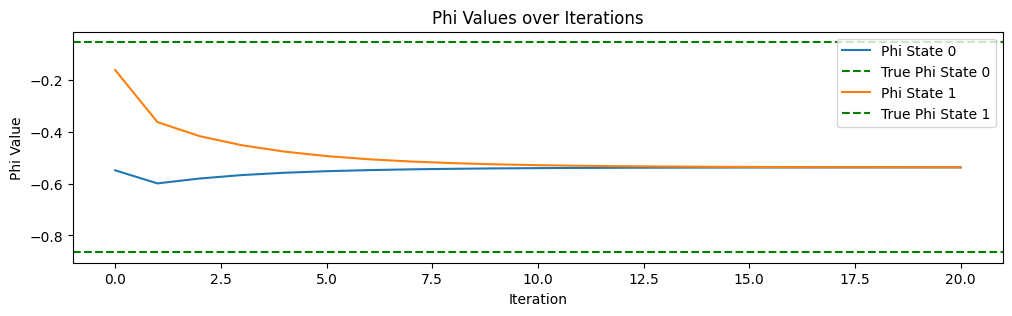

In [3]:
model.plot_convergence(true_phi=phi, true_alpha=alpha)

#model.plot_results()
#print(phi, alpha)

In [4]:
# model.summary()


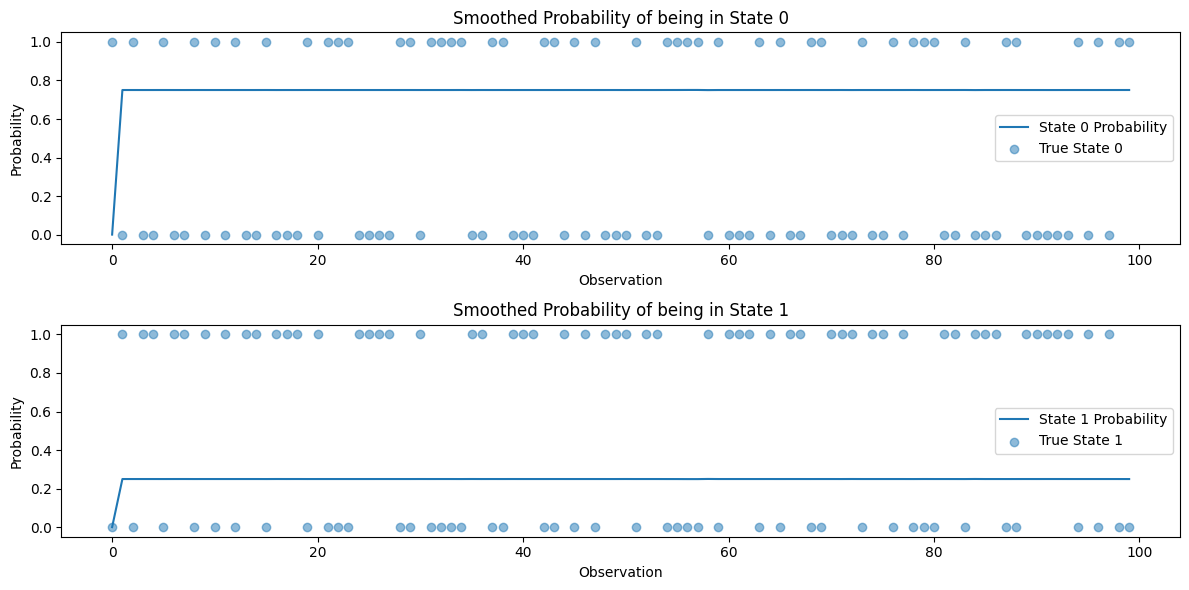

In [8]:
true_states = data['State']  # Replace with your true state series
model.plot_smoothed_probabilities(true_states=true_states)


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


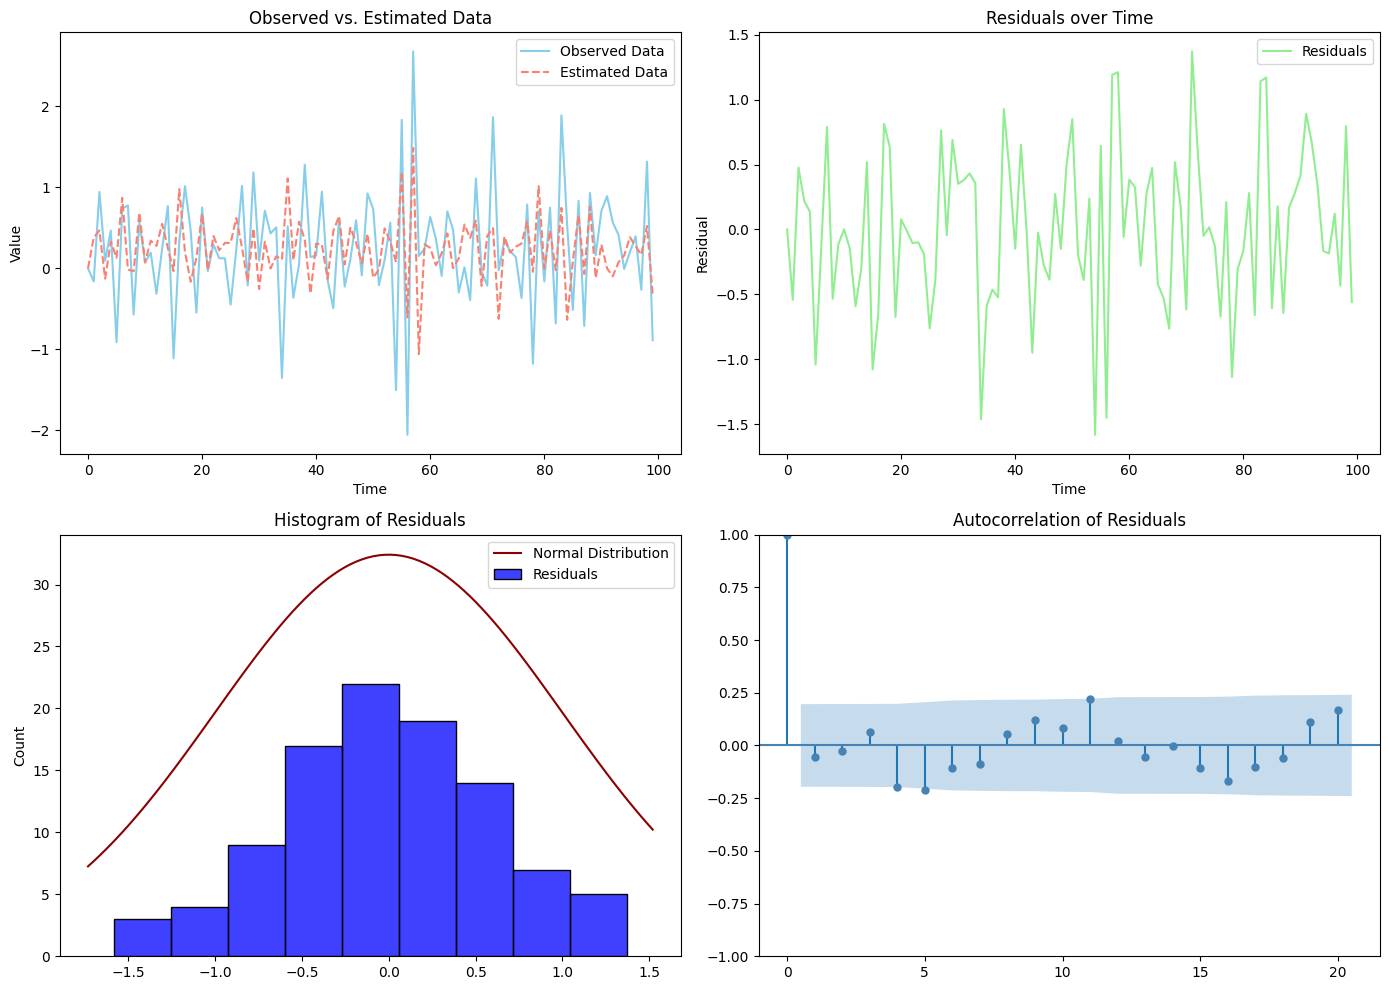

In [6]:
model.plot_model_diagnostics()



In [7]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# # Set the random seed for reproducibility
# np.random.seed(0)
# num_obs = 100
# # Generating parameters for the AR(1) process
# phi = np.random.uniform(-1, 1, size=2)  # Two values of phi in [-1, 1]
# alpha = np.random.uniform(0, 1, size=2)  # Two values of alpha in [0, 1]
# phi = [-0.1, 0.5]# Two values of phi in [-1, 1]
# alpha = [-0.1, 0.3]  # Two values of alpha in [0, 1]
# # Transition probabilities for the Markov chain
# transition_matrix = np.random.uniform(0, 1, size=(2, 2))
# transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)  # Normalize rows to sum to 1
# transition_matrix = [[0.8, 0.2],[0.1, 0.9]]
# # Generating 100 observations from a standard normal distribution
# e_t = np.random.normal(size=num_obs)

# # Initialize the state sequence and the AR(1) process
# states = np.zeros(num_obs, dtype=int)
# x_t = np.zeros(num_obs)

# # Set initial state
# states[0] = 0  # Starting in state 1 (index 0)
# x_t[0] = alpha[states[0]] + e_t[0]  # Initial value of the process

# # Generating the state sequence and the AR(1) process
# for t in range(1, num_obs):
#     # Determine next state based on transition probabilities
#     states[t] = np.random.choice([0, 1], p=transition_matrix[states[t-1]])

#     # Generate the AR(1) process value
#     x_t[t] = alpha[states[t]] + phi[states[t]] * x_t[t-1] + e_t[t]

# # Creating a DataFrame for the generated data
# data = pd.DataFrame({
#     'State': states,
#     'Observation': x_t
# })

# # Showing the first few rows of the DataFrame
# data
# print(phi, alpha)
# print(transition_matrix)
# plt.figure(figsize=(10, 6))
# plt.scatter(data.index, data['State'], color='red', label='State', alpha=0.6)
# plt.plot(data['Observation'], label='Observation', color='lightblue', alpha=0.6)
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Observations and States')
# plt.legend()
# plt.show()